# Aplicação de modelos lineares para previsão de preços ações

Nesse projeto serão apresentado e utilizados os principais algoritmos de *machine learning* do tipo regressão, que são modelos muito conhecidos na ciência de dados. Os modelos de regressão são usados quando temos *features* numéricas e temos uma variável *target* (ou alvo) que também é numérica.

Geralmente o modelo mais conhecido é a *Regressão Linear* (simples ou múltipla), entretanto existem outros modelos que são menos conhecidos, porém são mais robustos, possuindo mais parâmetros e podem apresentar resultados mais precisos. Todos os modelos que usaremos nesse projeto encontram-se na biblioteca *Scikit-Learn*; por serem muitos modelos lineares usaremos os principais modelos lineares e 

Aplicaremos esses modelos para previsão preços de ações do banco Itaú Unibanco (BBSA3) e vamos falar um pouco de cada modelo e, ao fim, comparar os modelos e definir qual é a melhor regressão com base nas métricas **RMSE** e $R^2$.

## Etapas

1) Importação das bibliotecas;

2) Importação dos dados;

3) Análise exploratória;

4) Separação dos dados de treino e teste;

5) Definição da *baseline*

6) Aplicação dos modelos de regressão;

7) Comparação dos resultados.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson

plt.style.use('ggplot')

## Importando os dados

Os dados que importamos são séries de dados sobre ações de diversas empresas listadas na IBovespa. Os preços são de 1994 até o ano de 2020 e possuem periodicidade diária.

Esse dados podem ser obtidos no próprio site da IBovespa, onde são publicados diariamente ou no seguinte [link](https://www.kaggle.com/felsal/ibovespa-stocks).

In [2]:
b3=pd.read_csv('b3_stocks_1994_2020.csv',encoding='utf-8',index_col='datetime')

Primeiras observações da base de dados.

In [3]:
b3.head()

,ticker,open,close,high,low,volume
datetime,,,,,,
1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.0
1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.8
1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.0
1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.0
1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.0


Últimas observações da base de dados.

In [4]:
b3.tail()

,ticker,open,close,high,low,volume
datetime,,,,,,
2020-07-31,SPXI11,178.07,180.16,180.16,176.50,7421028.60
2020-07-31,VIGT11,104.98,104.85,104.98,103.53,1247182.95
2020-07-31,XBOV11,103.46,100.89,103.46,100.89,13164.90
2020-07-31,XPIE11,95.40,96.00,96.90,95.00,20125.15
2020-07-31,XPOM11,99.95,99.95,99.95,99.95,1599.20


A base de dados é bem vasta, como pode ser visto abaixo as suas dimensões.

In [5]:
b3.shape

(1821092, 6)

Abaixo podemos ver a tabela com a principais estatísticas dessa base de dados.

In [6]:
b3.describe()

,open,close,high,low,volume
count,1.821092e+06,1.821092e+06,1.821092e+06,1.821092e+06,1.821092e+06
mean,6.559782e+01,6.573896e+01,6.627025e+01,6.501379e+01,1.568689e+07
std,1.708030e+03,1.713443e+03,1.718424e+03,1.701743e+03,9.262535e+07
min,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00
25%,3.800000e+00,3.800000e+00,3.860000e+00,3.710000e+00,1.794400e+04
50%,1.320000e+01,1.320000e+01,1.346000e+01,1.300000e+01,2.500800e+05
75%,3.526000e+01,3.531000e+01,3.590000e+01,3.490000e+01,4.657127e+06
max,1.297776e+06,1.297776e+06,1.297776e+06,1.297776e+06,3.272022e+10


A base de dados não possui valores faltantes.

In [7]:
b3.isna().sum()

ticker    0
open      0
close     0
high      0
low       0
volume    0
dtype: int64

A coluna *ticker* que mostra qual o código da ação da empresa é do tipo objeto e as demias são do tipo *float64*.

In [8]:
b3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821092 entries, 1994-07-04 to 2020-07-31
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ticker  object 
 1   open    float64
 2   close   float64
 3   high    float64
 4   low     float64
 5   volume  float64
dtypes: float64(5), object(1)
memory usage: 97.3+ MB


Como não temos valores faltantes e os dados estão na sua forma correta, não precisaremos imputá-los ou tranformá-los para outro tipo de dado.

Vemos que temos um total de 3191 ações de empresas nesse banco de dados. Um número muito grande para ser analisado, tão grande que quando chamamos com a função *unique* esses valores não aparecem em sua totalidade. 

In [9]:
b3['ticker'].nunique()

3191

In [10]:
b3['ticker'].unique()

array(['ACE 3', 'ALP 3', 'ALP 4', ..., 'C1HK34', 'BBVH11', 'SOMA3'],
      dtype=object)

Por esse motivo escolhemos as ações do banco **Itaú Unibanco** que é nomeada como *BBAS3* e esse 3 no final refere-se às ações ordinárias, ou seja, as ações que dão direito a voto (caso terminasse com 4 seriam as ações preferenciais, que dão direito a recebimento de dividendos).

O banco Itaú Unibanco foi escolhido por ser antigo, de cerca de 90 anos, é o maior banco privado do Brasil e a maior instituição financeira da América Latina e uma das maiores do mundo.

Então vamos usar apenas as ações do Itaú Unibanco e criaremos um novo *dataset*.

In [11]:
itau=b3[b3['ticker']=='BBAS3']

Vamos visualizar os *dataset*.

Nas colunas temos o nome da ação, o preço de abertura, de fechamento, de alta, de baixa e o volume da ação.

In [12]:
itau.head()

,ticker,open,close,high,low,volume
datetime,,,,,,
1998-03-16,BBAS3,8.10,8.00,8.10,7.90,120403.0
1998-03-17,BBAS3,8.15,8.35,8.35,8.10,1070483.0
1998-03-18,BBAS3,8.50,8.30,8.60,8.30,286528.0
1998-03-19,BBAS3,8.50,8.39,8.50,8.08,208695.0
1998-03-20,BBAS3,8.50,8.45,8.50,8.30,73527.0


Visualizando a séries de preços

Vemos que há duas quedas: de 1998 até o ano de 2008 a tendência é de crescimento, mas há uma queda, provavelmente por conta da crise econômica no setor bancário dos EUA e que afetou outras economias do mundo e, consequentemente, afetou o Brasil. Por conta da natureza do Itaú Unibanco (que é do setor bancário) esse choque se reflete nos preços das ações (abertura, fechamento, alta e baixa) e de forma bem acentuada.

Após a crise 2008 os preços não parecem ter uma tendência de alta até o ano de 2016, onde começam a subir, porém sem a mesma intensidade pré-crise. Entretanto temos uma segunda queda no ano de 2020, por conta da pandemia causada pelo coronavírus e pode ser vista no final da série.

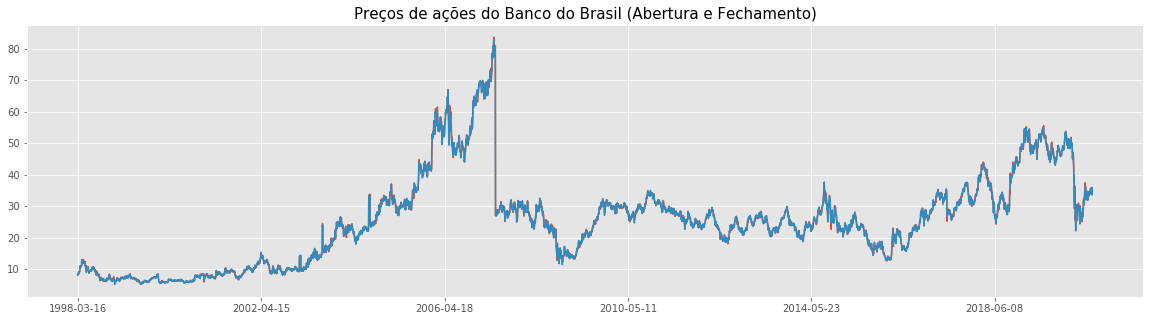

In [13]:
plt.title('Preços de ações do Banco do Brasil (Abertura e Fechamento)',size=15)
b3[b3['ticker']=='BBAS3']['open'].plot(figsize=(20,5))
b3[b3['ticker']=='BBAS3']['close'].plot(figsize=(20,5))
plt.xlabel('');

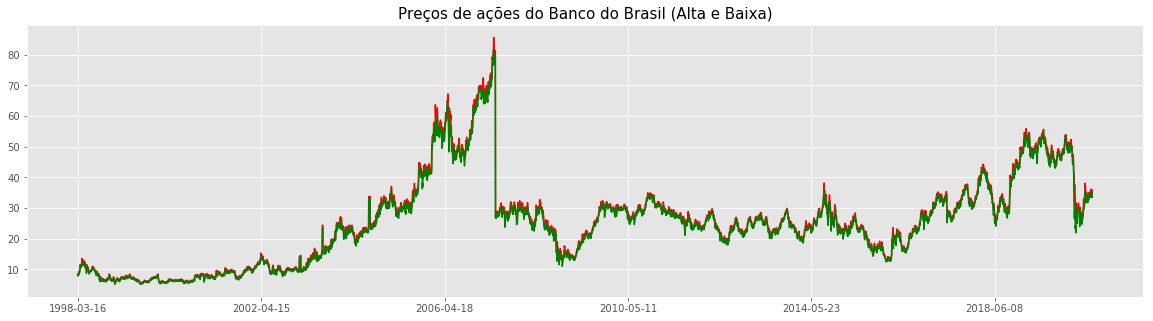

In [14]:
plt.title('Preços de ações do Banco do Brasil (Alta e Baixa)',size=15)
b3[b3['ticker']=='BBAS3']['high'].plot(figsize=(20,8),color = 'red')
b3[b3['ticker']=='BBAS3']['low'].plot(figsize=(20,5),color='green')
plt.xlabel('');

Abaixo podemos ver a tabela estatística das preços das ações do Itaú Unibanco, onde podemos verificar a média, o valor máximo, mínimo, o desvio padrão e os quartis (1º, 2º e 3º).

In [15]:
itau.describe()

,open,close,high,low,volume
count,5532.000000,5532.000000,5532.000000,5532.000000,5.532000e+03
mean,25.472880,25.463449,25.896036,25.029078,1.384535e+08
std,14.164018,14.169200,14.352134,13.954865,1.928909e+08
min,5.250000,5.100000,5.400000,5.100000,2.060000e+03
25%,14.200000,14.175000,14.487500,13.900000,3.548163e+06
50%,24.790000,24.795000,25.180000,24.360000,7.909178e+07
75%,30.880000,30.900000,31.292500,30.372500,1.828971e+08
max,83.640000,83.150000,85.700000,81.500000,2.170666e+09


**Correlação entre os preços e o volume**

Os preços possuem uma correlação muito alta, ou seja, andam perfeitamente juntas e podem ser usadas gerar previsões. Entretanto em modelos de regressão podemos ter um problema chamado de multicolinearidade pela alta correlação entre as variáveis preditoras.

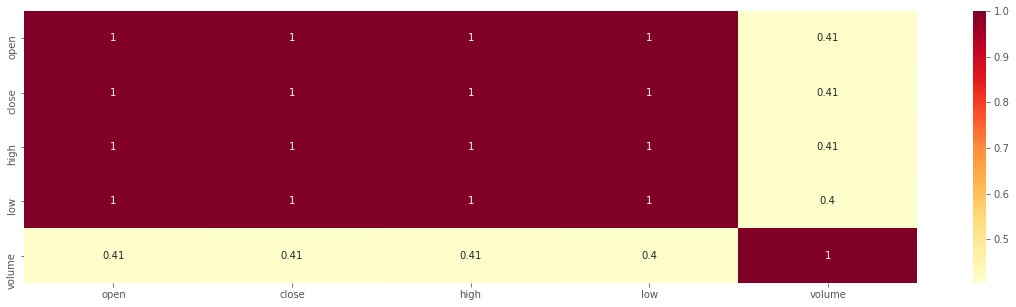

In [16]:
%matplotlib inline
plt.figure(figsize=(20,5))
correlacao=b3[b3['ticker']=='BBAS3'].corr()
sns.heatmap(correlacao, annot = True, cmap = "YlOrRd");

Vamos agora criar uma coluna que vai mostrar a variação que ocorre entre o preço de abertura e o preço de fechamento. O objetivo disso é analisar se há uma grande variação entre esses preços ao longo do tempo.

In [17]:
itau['variacao']=(itau['open']-itau['close'])/itau['open']

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Plotando a coluna variação**

Vemos que as taxas de variação estão entorno de zero.

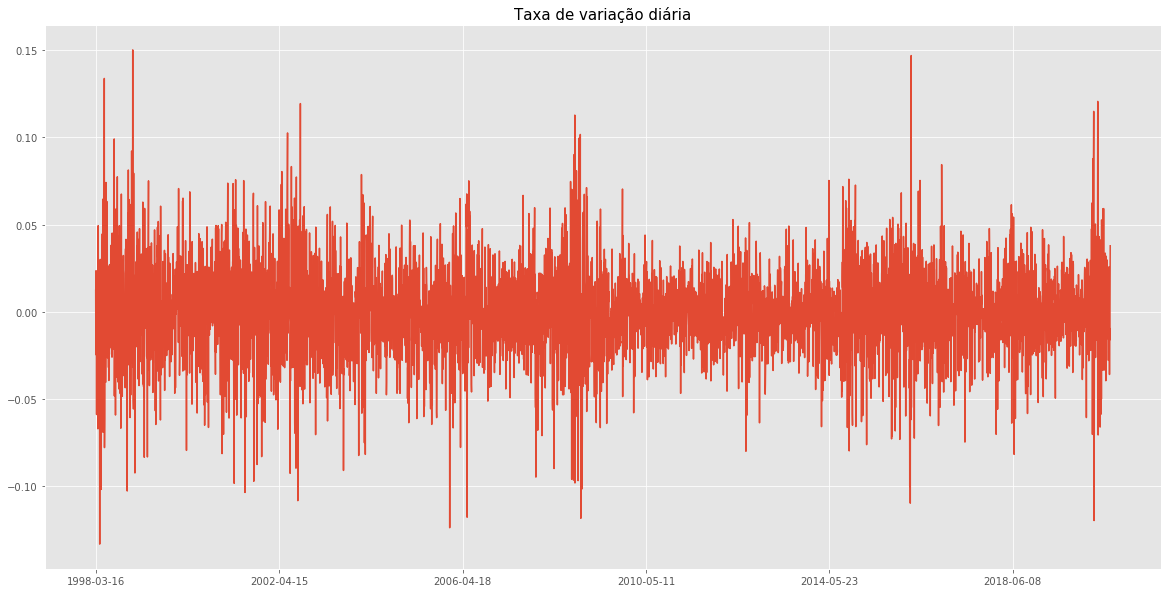

In [18]:
plt.figure(figsize=(20,10))
itau['variacao'].plot()
plt.title('Taxa de variação diária',size=15)
plt.xlabel('');

O **RMSE**, que é a raiz quadrada da soma dos erros quadrados, é bem baixo (menor que 1).

In [19]:
rmse(itau['open'],itau['close'])

0.6540094511977371

A principal conclusão que tiramos é que, a princípio, podemos usar os dados de abertura para prever os dados de fechamento já que a taxa de variação ser próxima de zero e do **RMSE** ser tão baixo.

Vamos, então, analisar um pedaço da série que vai do ano janeiro de 2019 até 2020.

Podemos ver, abaixo, o choque nas ações do Itaú Unibanco causada por conta da pandemia do coronavírus. Os preços só voltam a crescer em março de 2020. Podemos ver de forma mais visível a queda por conta da pandemia do coronavírus, onde o preço das ações estavam por volta de R$ 50 e cai para menos da metado do valor.

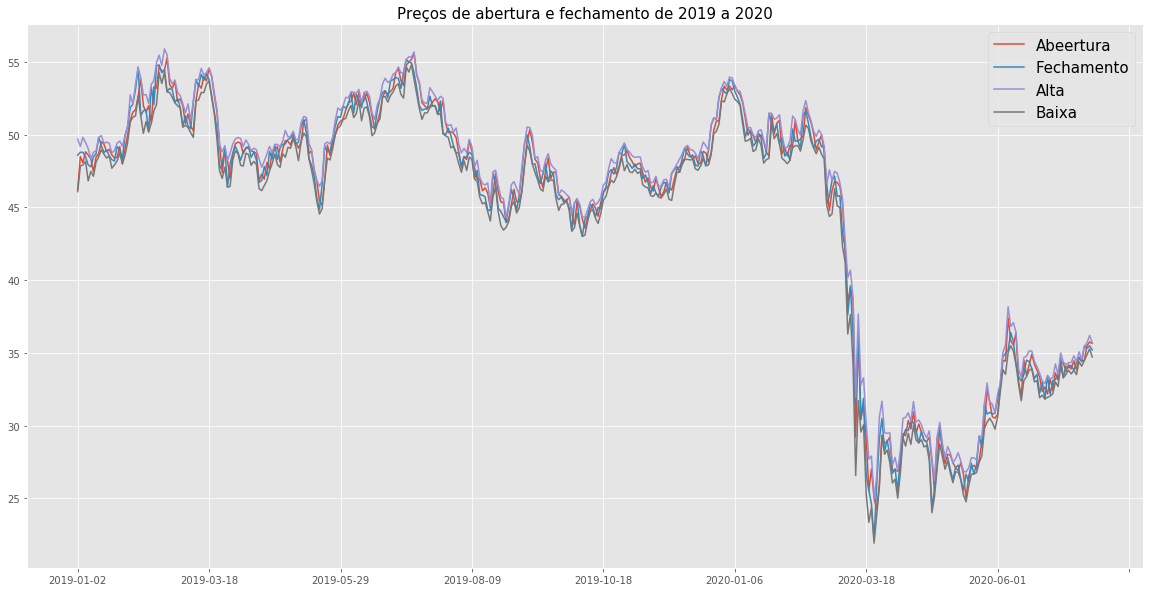

In [20]:
itau.loc['2019-01-02':'2020-07-22'][['open','close','high','low']].plot(figsize=(20,10))
plt.title('Preços de abertura e fechamento de 2019 a 2020',size=15)
plt.legend(['Abeertura','Fechamento','Alta','Baixa'],fontsize=15)
plt.xlabel('');

Novamente a tabela estatística, porém do novo intervalo das séries de preços das ações.

In [21]:
itau.loc['2019-01-02':'2020-07-22'][['open','close','high','low']].describe()

,open,close,high,low
count,387.000000,387.000000,387.000000,387.000000
mean,44.867028,44.781240,45.510827,44.106357
std,8.404711,8.443453,8.321591,8.505721
min,24.200000,22.130000,25.000000,21.910000
25%,43.865000,43.265000,44.335000,43.055000
50%,48.150000,48.150000,48.830000,47.560000
75%,50.325000,50.410000,51.060000,49.740000
max,55.600000,55.180000,55.910000,54.820000


A distribuição dos dados mostra que a curva de distribuição dos preços das ações *BBSA3* não possuem uma curva do tipo sino, logo não possuem uma distribuição normal.

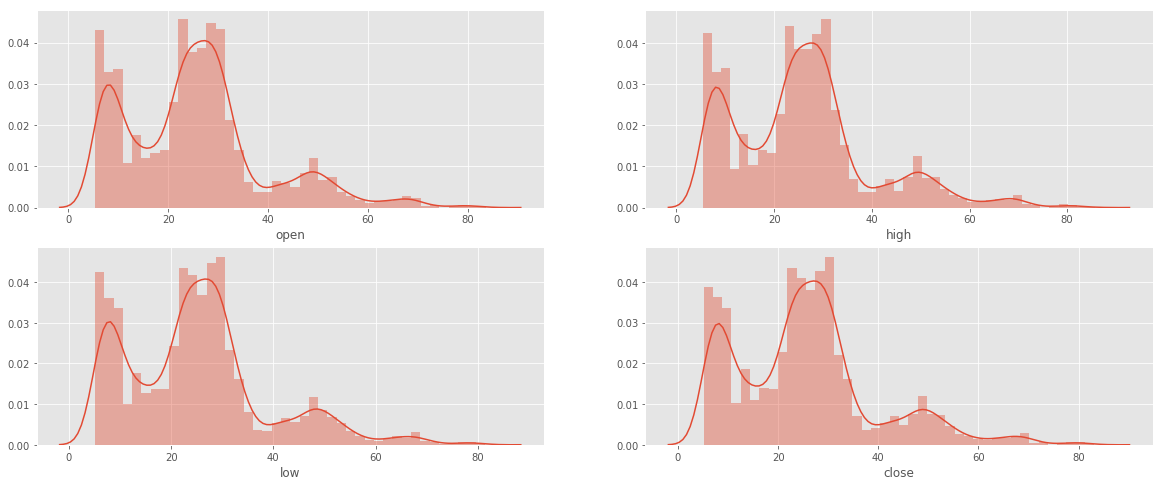

In [22]:
fig, axarr = plt.subplots(2,2, figsize=(20,8))
sns.distplot(itau['open'], ax=axarr[0][0])
sns.distplot(itau['high'], ax=axarr[0][1])
sns.distplot(itau['low'], ax=axarr[1][0])
sns.distplot(itau['close'], ax=axarr[1][1]);

A correlação entre os preços do intervalo selecionada caiu um pouco, ainda assim é bastante alta.

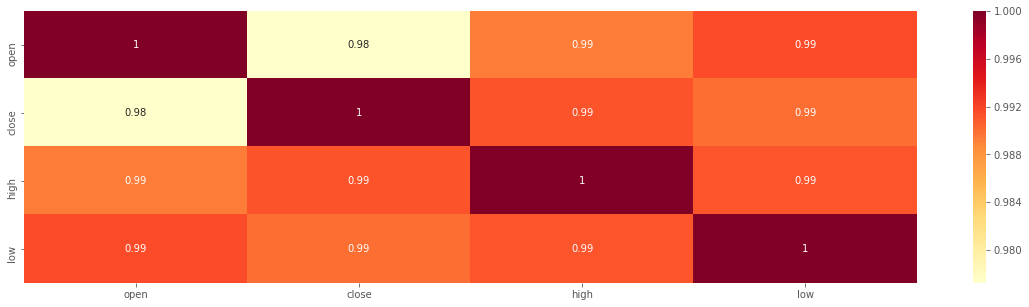

In [23]:
%matplotlib inline
plt.figure(figsize=(20,5))
correlacao=itau.loc['2019-01-02':'2020-07-22'][['open','close','high','low']].corr('spearman')
sns.heatmap(correlacao, annot = True, cmap = "YlOrRd");

A taxa de variação para o período de 2019 a 2020

Notamos que em março de 2020 há uma variação maior, justamente no momento de volta de crescimento do preço das ações *BBSA3*; mas nada que distorça o comportamento da taxa de variação ao longo do tempo.

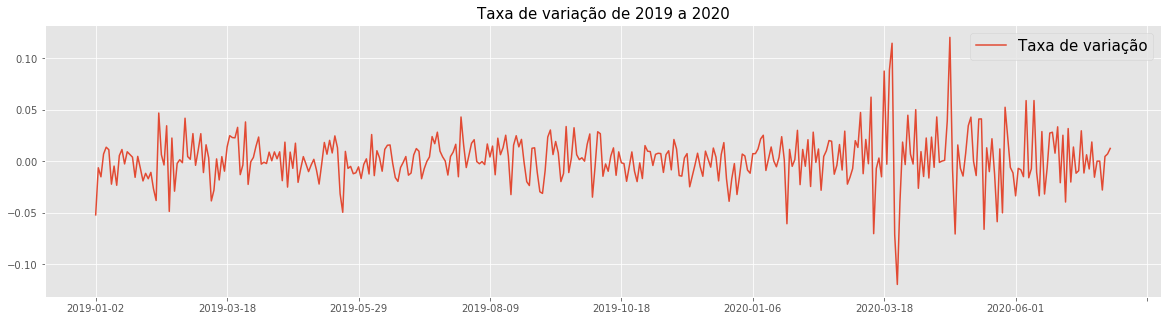

In [24]:
itau.loc['2019-01-02':'2020-07-22'][['variacao']].plot(figsize=(20,5))
plt.title('Taxa de variação de 2019 a 2020',size=15)
plt.legend(['Taxa de variação'],fontsize=15)
plt.xlabel('');

E por fim o **RMSE** teve um aumento, porém ainda é menor que 1 (entretanto ficou acima do desvio padrão).

In [25]:
rmse(itau.loc['2019-01-02':'2020-07-22']['open'],itau.loc['2019-01-02':'2020-07-22']['close'])

0.9206019825830908

Vamos criar outra *dataset* com os valores do intervalo de 2019 a 2020. 

In [26]:
itau2=itau.loc['2019-01-02':'2020-07-22'][['open','high','low','close']]

In [27]:
itau2.head()

,open,high,low,close
datetime,,,,
2019-01-02,46.20,49.70,46.09,48.60
2019-01-03,48.50,49.20,47.85,48.80
2019-01-04,48.08,49.83,47.92,48.80
2019-01-07,48.83,49.47,48.17,48.48
2019-01-08,48.60,49.05,46.83,47.93


Temos agora uma base menor com 387 linhas (dias) e 4 colunas.

In [28]:
itau2.shape

(387, 4)

## Separando dados de treino e teste

Agora vamos separar uma parte dos dados que irão ser usadas para treinar os algoritmos de *machine learning* do tipo árvore. Essa conjunto de dados só terão os dados de abertura, alta e baixa (sem os dados de fechamento). Depois com os dados de teste vamos aplicá-los no algoritmo treinado e vamos gerar as previsões.

Os dados de treino serão do ano de 2019 e os dados de teste serão os dados do ano de 2020.



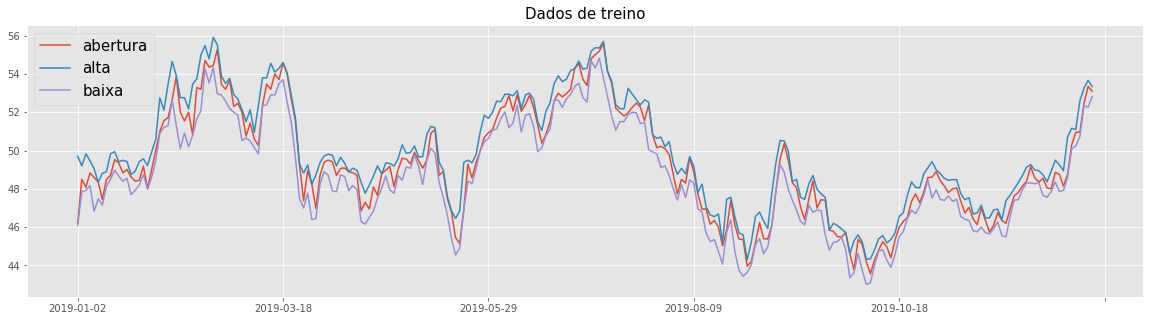

In [29]:
#treino=itau2[['open']][:-139]
treino=itau2[['open','high','low']][:-139]
treino.plot(figsize=(20,5))
plt.title('Dados de treino',size=15)
plt.legend(['abertura','alta','baixa'],fontsize=15)
plt.xlabel('');

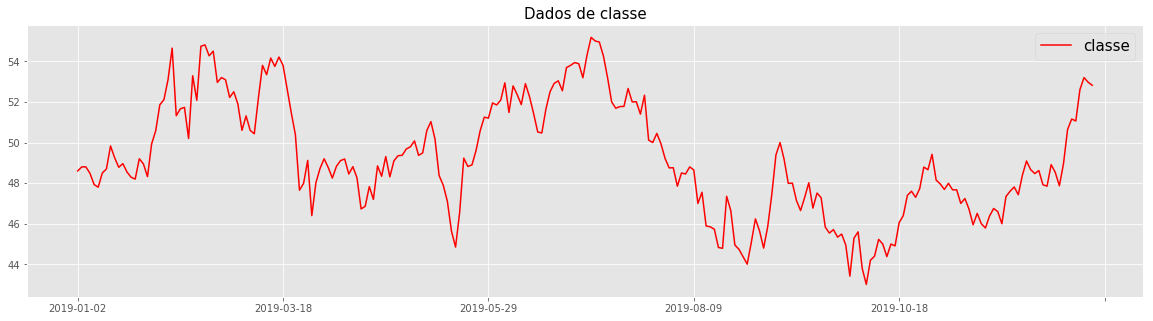

In [30]:
classe=itau2[['close']][:-139]
classe.plot(figsize=(20,5),color='red')
plt.title('Dados de classe',size=15)
plt.legend(['classe'],fontsize=15)
plt.xlabel('');

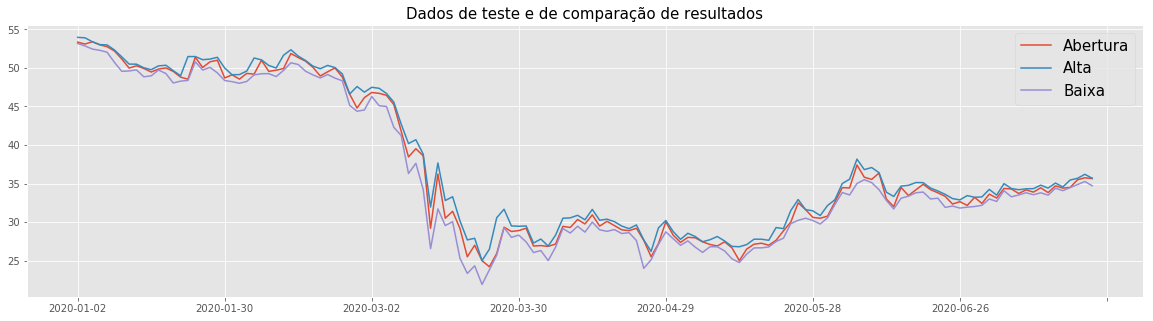

In [31]:
teste=itau2[['open','high','low']][-139:]
teste.plot(figsize=(20,5))
plt.title('Dados de teste e de comparação de resultados',size=15)
plt.legend(['Abertura','Alta','Baixa'],fontsize=15)
plt.xlabel('');

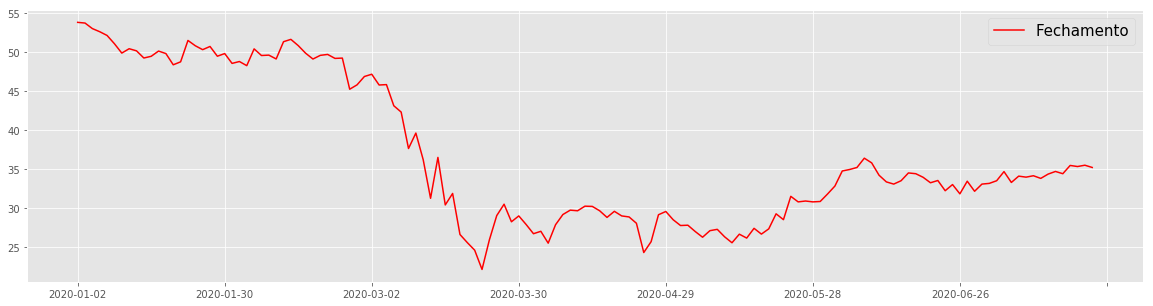

In [32]:
compara=pd.DataFrame(itau2[-139:]['close'])
compara.plot(figsize=(20,5),color='red')
plt.legend(['Fechamento'],fontsize=15)
plt.xlabel('');

## *Baseline*

Vamos definir nossa *baseline* da seguinte forma: Os valores de abertura são bastante próximos dos valores de fechamento, podemos, então, definir o valor de abertura um referencial para o valor de fechamento. O que estou dizendo é que a forma mais simples de prever o preço de fechamento é pelo preço de abertura da ação.

Se isso fosse feito, qual seria o nosso **RMSE**, usando os valores de abertura como valores de previsão?

Encontramos o valor de **1.0468890640028519**.

In [33]:
rmse(itau2[-146:]['open'],itau2[-146:]['close'])

1.0468890640028519

Vamos inserir esse valor em uma variável.

In [34]:
baseline=rmse(itau2[-146:]['open'],itau2[-146:]['close'])

E qual seria o $R^2$ da nossa *baseline* ?

O $R^2$ da nossa *baseline* é **0.9879825661201452**, como podemos ver abaixo. Esse resultado é muito alto e precisaremos de um modelo que supere esse valor.

In [35]:
r2_score(itau2[-146:]['open'],itau2[-146:]['close'])

0.9879825661201452

Será que é possível encontrarmos com modelos de *machine learning* do tipo árvore de regressão um **RMSE** menor que o da *baseline* que definimos ?

Responderemos essa pergunta na nossa próxima etapa.

## Aplicação dos modelos de regressão

Nessa etapa usaremos os modelos de *machine learning* do tipo árvore de regressão e falaremos um pouco sobre cada um desses modelos.

Anteriormente falamos que modelos de regressão podem sofrer de problemas de multicolinearidade, por conta da alta correlação entre *features* preditoras; porém os modelos de tipo árvore possuem uma vantagem, pois como elas fazem a divisão das variáveis mais importantes, elas são por natureza imunes a multicolinearidade.

### Regressão Linear

Antes de utilizarmos os modelos do tipo árvore, vamos usar o modelo de regressão mais simples, que é o modelo de regressão linear. O modelo de regressão linear simples tem a seginte estrutura:

$Y = \beta.X + \epsilon $

Onde $Y$ é a variável dependente ou a ser explicada, $X$ a variável explicativa ou independente e $\epsilon \sim  N(0,\sigma^{2})$.

O modelo de regressão linear atribui a cada uma das *features* um peso e esse peso tem como objetivo minimizar a soma dos erros quadrados entre os valores observados e os valores previstos. O estimador de mínimos quadrados ordinários é uma matriz que segue a fórmula:

$\beta = (X'X)^{-1}X'Y $.

Onde $X$ é a matriz de variáveis independentes (ou preditoras) e $y$ é a variável dependente (ou predita). No nosso projeto estaremos trabalhando com mais de uma variável, então teremos uma regressão múltipla, que tem a seguinte estrutura:

$Y = \beta_{1}.X_{1} + \beta_{2}.X_{2} + \dots + \beta_{k}.X_{k} + \epsilon $

Onde $X_{1},X_{2},\dots,X_{k}$ são as variáveis explicativas.

A soma do quadrados dos resíduos do modelo de resgressão linear é dado por :

$\text{RSS} = \sum_{i=1}^{n} \big[y_{i} - (wx_{i} + b) \big]^{2}$

O nosso primeiro passo será instanciar o modelo e treiná-lo com as *features* que já separamos.

In [36]:
linear_model=LinearRegression().fit(treino,classe)

E vamos gerar as previsões com a base de teste.

In [37]:
pred=pd.DataFrame(linear_model.predict(teste))

In [38]:
predict=pd.DataFrame(linear_model.predict(teste))
predict=predict.set_index(compara.index)

Comparando os resultados graficamente e metricamente

Abaixo podemos ver o gráfico da série original e da série prevista estão bem próximas uma da outra, um ou outro ponto estão divergindo como no que ocorre antes do mês de março e outro dentro do mês de março.

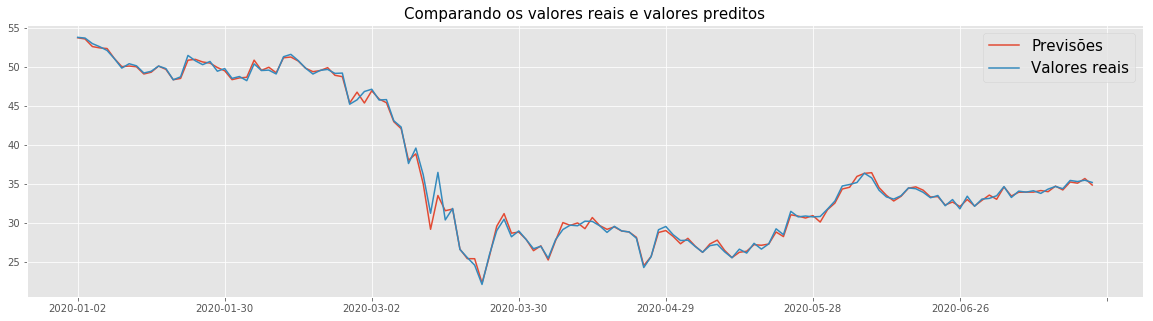

In [39]:
pred.plot(figsize=(20,5))
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Agora observando a métrica que escolhemos (**RMSE**) vemos que o valor ficou bem menor que a *baseline*, na verdade ficou menos da metade do valor da *baseline*.

In [40]:
rmse(predict,compara)[0]

0.48333422876443455

A queda em relação a *baseline* foi de quase 54%.

In [41]:
print(round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

-53.831 %


O que concluímos é que o modelo mais simples foi bem melhor que a nossa *baseline*. O que queremos daqui por diante é que os modelos do tipo árvore de regressão tenham um desempenho melhor (ou seja, um **RMSE** menor) que o modelo de regressão linear simples.

Mas falamos sobre o problema de multicolinearidade, será que nesse nosso modelo tivemos esse problema nesse modelo ?

Vamos observar os coeficientes que a regressão linear gerou.

In [42]:
print(linear_model.intercept_,linear_model.coef_)

[-0.08998822] [[-0.68999241  0.83242938  0.8599207 ]]


### Sumário do modelo

Com a biblioteca *Statsmodels* podemos gerar o sumário estatístico do modelo de regressão linear. Nesse sumário veremos as estatísticas e teste desse modelo.

Vemos que, com exceção da constante, todos os outros parâmetros das variáveis de preços (alta, baixa e abertura) são significantes e o teste F aponta para uma significância conjunta dos parâmetros. Além disso temos um $R^{2}$ e $R^{2}$ ajustado altos, e não há evidência de autocorrelação, pois o valor da estatística Durbin-Watson está bem próxima de 2. A probabilidade Jarque-Bera está acima de 5% (que mostra que a distribuição dos resíduos são normais). Entretanto, conforme a observação [2] no final do sumário, o número de condição é alto, o que pode indicar multicolinearidade, o que para previsão não é um problema.  

In [43]:
X = sm.add_constant(treino)
model=sm.OLS(classe,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     5372.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):          1.89e-222
Time:                        14:51:45   Log-Likelihood:                -84.405
No. Observations:                 248   AIC:                             176.8
Df Residuals:                     244   BIC:                             190.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0900      0.393     -0.229      0.819      -0.865       0.685
open          -0.6900      0.048    -14.407      0.000      -0.784      -0.596
high           0.8324      0.050     16.746      0.000       0.735       0.930
low            0.8599      0.052     16.560      0.000       0.758       0.962
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.463
Skew:                           0.050   Prob(JB):                        0.481
Kurtosis:                       3.363   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regressão Ridge

Agora vamos para o próximo modelo que iremos usar será a Regressão Ridge. Esse modelo de regressão é bastante usado quando temos um modelo de regressão que sofre com o problema de multicolinearidade. Uma das formas de tratar um modelo de regressão com multicolinearidade é encontrarmos um modelo em que a variância seja reduzida adicionando um pouco de viés. Esse processo de *trade-off* entre variância e viés, chamamos de regularização.

A soma do quadrados dos resíduos do modelo de resgressão Ridge é dado por :

$\text{RSS}_{Ridge} = \sum_{i=1}^{n} \big[y_{i} - (wx_{i} + b) \big]^{2} + \alpha \sum_{j=1}^{p} w_j^2$

Vamos agora instanciar e treinar o modelo; e usaremos o $\alpha$ padrão que é 0.1.

In [44]:
ridge=Ridge(alpha=0.1).fit(treino,classe)

Vamos agora gerar as previsões do modelo de regressão **Ridge**.

In [45]:
pred=pd.DataFrame(ridge.predict(teste))

E compararemos graficamente os resultados gerados.

Vemos que as previsões ficaram bem próximas dos valores reais, tendo ainda as mesmas diferenças apresentadas nos períodos que já tínhamos falado anteriomente, quando comparamos as previsões da regressão linear.

In [46]:
predict=pd.DataFrame(ridge.predict(teste))
predict=predict.set_index(compara.index)

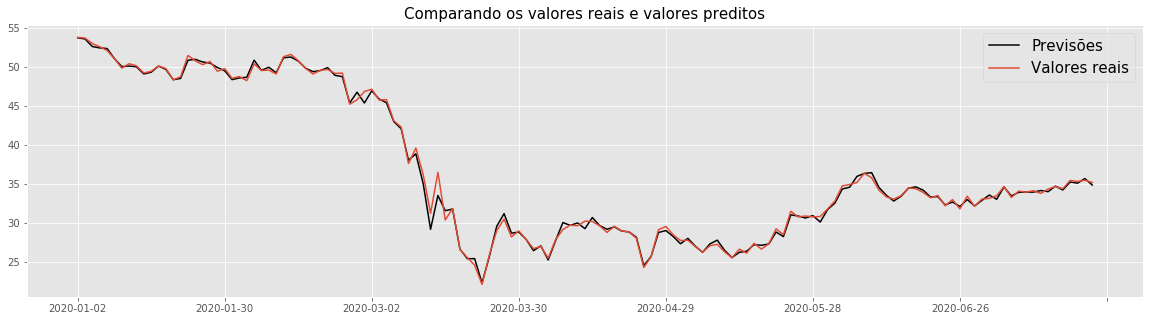

In [47]:
pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

A nossa métrica de avaliação teve um resultado bem menor que nossa *baseline* e um resultado um pouco menor que da regressão linear; o que fez com que houvesse uma queda, em relação ao modelo anterior, porém pequena.

In [48]:
print('RMSE do modelo de regressão Ridge:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão Ridge: 0.4828874934382058
Queda em relação a baseline : -53.874 %


Abaixo podemos ver os coeficientes do modelod de regressão **Ridge**.

In [49]:
print(ridge.intercept_,ridge.coef_)

[-0.0880232] [[-0.68700157  0.83108971  0.85822307]]


Vamos agora fazer o diagnóstico desse modelo, onde vamos analisar se ele tem multicolinearidade, se os resíduos não normais, se há autocorrelação e qual o valor do $R^{2}$.

#### Análise dos resíduos

Aqui iremos analisar os resíduos do modelo de regressão **Rigde**. Para isso iremos comparar os valores gerados pelo modelo com os dados de treino e os dados da variável que chamamos de *classe* que é o nosso *target*, a diferença entre esses valores serão os nossos resíduos e, por fim, teremos que averiguar se esses resíduos possuem o comportamento de uma distribuição normal (usaremos o teste de normalidade *Jarque-Bera*).

Gerando os resíduos.

In [50]:
treinado=pd.DataFrame(ridge.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

#### Análise gráfica dos resíduos

O primeiro gráfico são os resíduos: Os resíduos parecem estar flutuando sobre o valor de zero;

o segundo é o histograma dos resíduos e aparenta ter uma formato de sino (*bell curve*);

O terceiro gráfico é o de autocorrelação e mostra que nenhum outro resíduo influencia o comportamento dos outros resíduos;

E, por fim, o QQplot, mostra que a maior parte dos quantis dos resíduos estão sobre a linha vermelha.

Os gráficos evidenciam que a distribuição é uma normal.

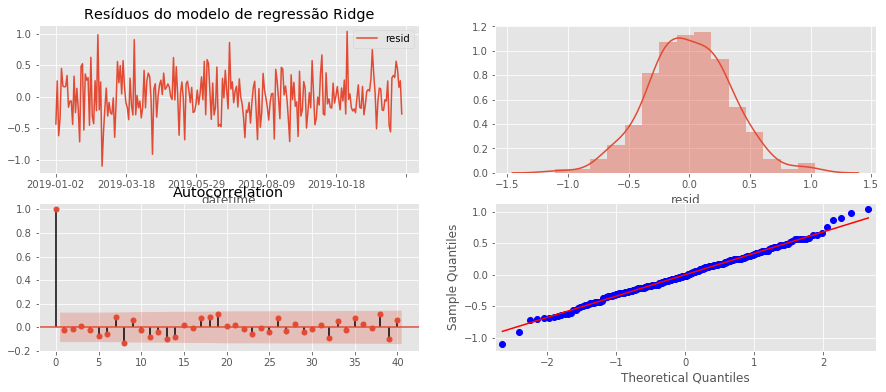

In [51]:
residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo de regressão Ridge", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

#### Teste de normalidade dos resíduos do modelo de regressão Ridge

Usando o teste de normalidade Jarque-Bera podemos inferir de forma objetiva se os resíduos do modelo são ou não normais. A hipótese nula do teste é que os resíduos são normais. Nas estatísticas abaixo vemos que os resíduos possuem um comportamento normal ( p-valor acima de 5%, coeficiente de assimetria próximo de zero e coeficiente de curtose próximo de 3).

In [52]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 1.4138514609261215
P-valor : 0.4931579699202725
Assimetria : 0.05061681236755296
Curtose : 3.3557753338152128


O $R^{2}$ é maior que o do modelo de regressão linear.

In [53]:
r2_score(pred,itau2[-139:]['close'])

0.9972658485738954

O modelo também não apresenta autocorrelação serial, pois a estatística Durbin-Watson está próxima de 2.

In [54]:
durbin_watson(treinado['resid'])

2.030208429256721

### Regressão *Lasso*

A regressão *Lasso* é um modelo linear que usa outro método de regularização. A soma do quadrado dos resíduos é dado por:

$\text{RSS}_{Ridge} = \sum_{i=1}^{n} \big[y_{i} - (wx_{i} + b) \big]^{2} + \alpha \sum_{j=1}^{p} |w_j|$

Ao invés de usar o quadrado dos coeficientes, a regressão *Lasso* usa o módulo. Quando temos *features* altamente correlacionadas, a regressão *Lasso* usa apenas uma dessa *features* e zera os coeficientes das outras, gerando coeficientes esparsos e fazendo uma seleção automática de variáveis.

Vamos instanciar e treinar o modelo de regressão *Lasso*.

In [55]:
lasso=Lasso(alpha=0.1).fit(treino,classe)

Gerando as previsões do modelo.

In [56]:
pred=pd.DataFrame(lasso.predict(teste))

#### Comparando graficamente as previsões do modelo *Lasso* e os valores reais

Aqui as previsões parecem estar menos ajustadas que os modelos anteriores.

In [57]:
predict=pd.DataFrame(lasso.predict(teste))
predict=predict.set_index(compara.index)

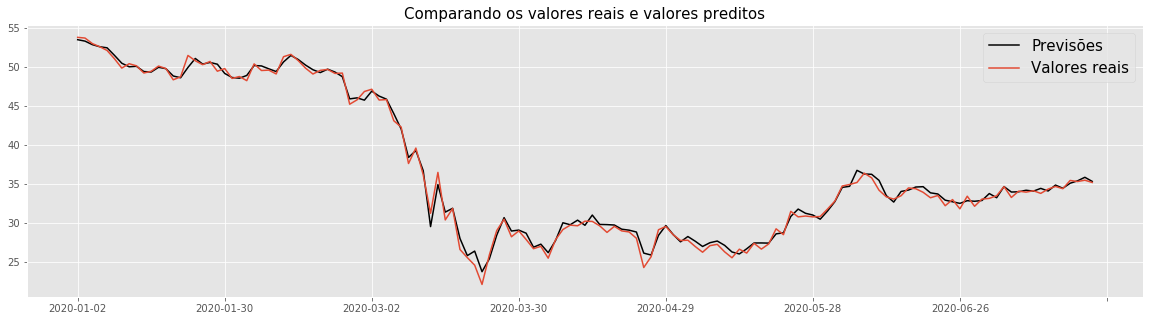

In [58]:
pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Já o **RMSE** e sua queda em relação a *baseline* tiveram um desempenho um pouco pior.

In [59]:
print('RMSE do modelo de regressão Ridge:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão Ridge: 0.6117374033286853
Queda em relação a baseline : -41.566 %


Coeficientes do modelo.

In [60]:
print(lasso.intercept_,lasso.coef_)

[0.50821058] [-0.          0.51405746  0.47484406]


#### Gerando e analisando os resíduos

In [61]:
treinado=pd.DataFrame(lasso.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

Os resíduos desse modelo parecem ser mais bem comportados que os modelos anteriores, isso se compararmos o histograma e o QQplot do modelo anterior.

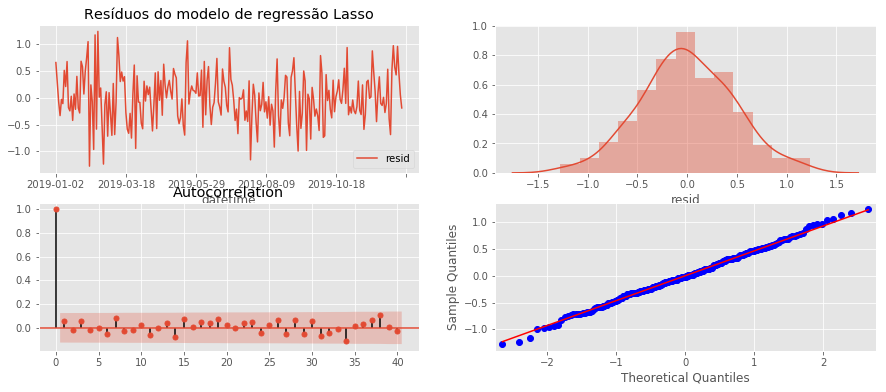

In [62]:
residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo de regressão Lasso", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O teste *Jarque-Bera* apresentou um resultado mais robusto para normalidade, com um *p-valor* próximo de 1 e coeficientes de assimetria e curtose mais ajustados a de uma distribuição normal.

In [63]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.030634421750568023
P-valor : 0.9847995009395393
Assimetria : 0.02609621973709034
Curtose : 2.9844896575967397


O $R^{2}$ do modelo foi ligeiramente menor, porém ainda sim é bastante alto.

In [64]:
r2_score(pred,itau2[-139:]['close'])

0.9954917440720986

Já a estatística *Durbin-Watson* se afastou mais de 2, mas ainda sim tem uma forte evidência de ausência de autocorrelação serial.

In [65]:
durbin_watson(treinado['resid'])

1.8752099408239127

Poderíamos usar uma variante da regressão *lasso* que é a *MultiTaskLasso* que um modelo linear que estima coeficientes esparsos para problemas de regressão múltipla. Para o nosso trabalho não houve diferença de resultados (nem para melhor nem para pior), por isso não iremos trabalhar com esse modelo.

## *Elastic-Net*

Um modelo que usa as duas formas de regularizações são a *Elastic-Net*. Essa combinação permite aprender um modelo esparso onde poucos dos pesos são diferentes de zero (*Lasso*), enquanto ainda mantém as propriedades de regularização da regressão *Ridge*. Nós controlamos a combinação convexa dos coeficientes de regularização *l1* e *l2* com o parâmetro $\rho$ parâmetro.

A soma do quadrado dos resíduos é dada por:

$\text{RSS}_{Elastic-Net} = \sum_{i=1}^{n} \big[y_{i} - (wx_{i} + b) \big]^{2} + \alpha \rho \sum_{j=1}^{p} |w_j| + \frac{\alpha(1-\rho)}{2} \sum_{j=1}^{p} w_j^2$.

Vamos agora instanciar e treinar o modelo.

In [66]:
elastic=ElasticNet().fit(treino,classe)

Gerando as previsões.

In [67]:
pred=pd.DataFrame(elastic.predict(teste))

Comparando as previsões e os resultados reais, vemos que há uma diferença muito grande dos resultados gerados pelo modelo após o mês de março. A previsões estão com valores bem abaixo dos reais, logo veremos esse resultado nas métricas de desempenho.

In [68]:
predict=pd.DataFrame(elastic.predict(teste))
predict=predict.set_index(compara.index)

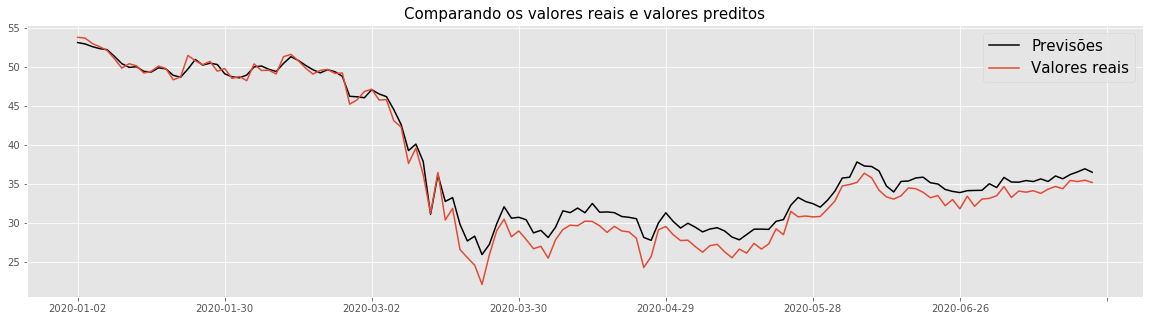

In [69]:
pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Aqui vemos que houve um aumento do **RMSE** em mais de 50%, logo o *Elastic-Net* é um modelo de pior desempenho.

In [70]:
print('RMSE do modelo de regressão Ridge:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão Ridge: 1.5827117060588571
Queda em relação a baseline : 51.182 %


Coeficientes do modelo.

In [71]:
print(elastic.intercept_,elastic.coef_)

[4.48464349] [0.08793803 0.41994742 0.40047249]


#### Gerando os resíduos da regressão *Elastic-Net*

Os resíduos do modelo parecem ser normais. Porém podemos algo diferente dos modelos anteriores como, no gráfico de autocorrelação em que as defasagens 0 a 4 são significativas.

In [72]:
treinado=pd.DataFrame(elastic.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

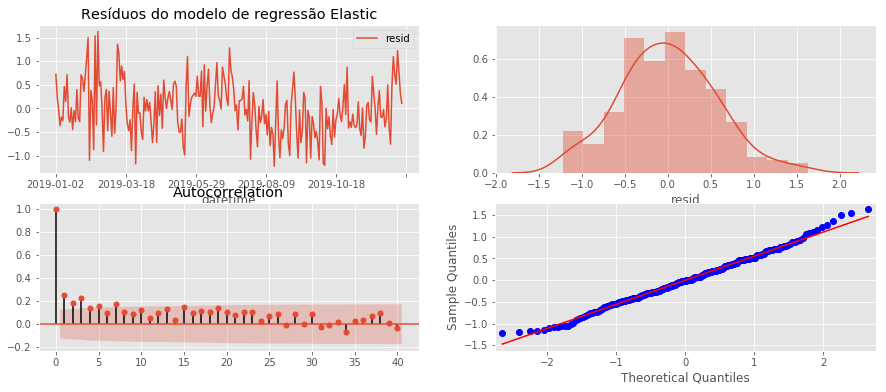

In [73]:
residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo de regressão Elastic", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O teste de normalidade apontou os resíduos como normais.

In [74]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 1.445628955023552
P-valor : 0.4853842287257534
Assimetria : 0.18699523544671037
Curtose : 3.0055411166310764


O $R^2$ da *Elastic-Net* foi menor que dos outros modelos já apresentados.

In [75]:
r2_score(pred,itau2[-139:]['close'])

0.964264341713493

Por fim, podemos ver que a estatística *Durbin-Watson* se distanciou mais de 2, o que pode ser uma evidência para autocorrelação serial nos resíduos.

In [76]:
durbin_watson(treinado['resid'])

1.478355142265049

## *Multi-task Elastic Net*

Uma variante da *Elastic Net* é a *Multi-task Elastic Net* , que ao invés de usar o *l1* e *l2* na minimização dos erros, utiliza *l1* e *l2 norm* combinados (*l2* que é a distância de Manhattan ou a soma das dos módulos dos parâmetros da regressão) e a *l2 norm* para regularização.

In [77]:
multielastic=MultiTaskElasticNet(alpha=0.1).fit(treino,classe)

Gerando as previsões com o modelo.

In [78]:
pred=pd.DataFrame(multielastic.predict(teste))

Comparando os resultados.

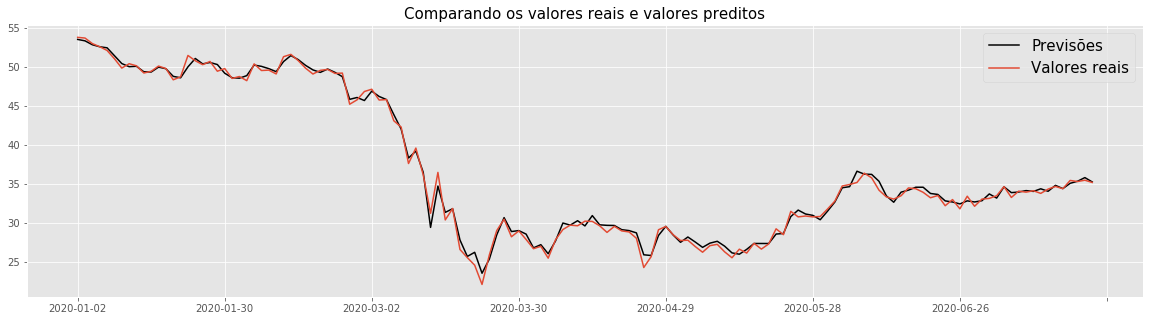

In [79]:
predict=pd.DataFrame(multielastic.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

O modelo teve um bom desempenho em comparação a *baseline*, mas não superou o regressão *Ridge*.

In [80]:
print('RMSE do modelo de regressão Ridge:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão Ridge: 0.5737457523740772
Queda em relação a baseline : -45.195 %


Parâmetros do modelo.

In [81]:
print(multielastic.intercept_,multielastic.coef_)

[0.36627555] [[-0.06369658  0.536864    0.51893345]]


#### Análise e diagnóstico dos residuos

O resíduos parecem estar flutuante em torno de 0 e possuir uma distribuição em forma de sino. Além disso, parecem estar não possuir autocorrelação, pois suas defasagens não são estatisticamente significantes. Praticamente todos os quantis estão sobre a linha vermelha do gráfico QQplot.

In [82]:
treinado=pd.DataFrame(multielastic.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

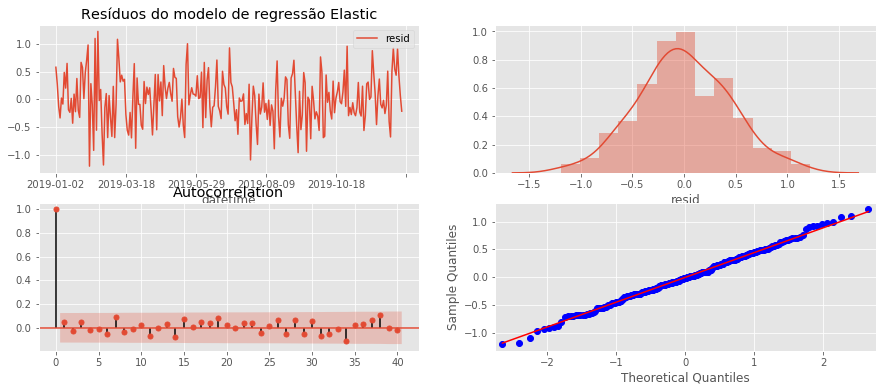

In [83]:
residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo de regressão Elastic", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O teste de normalidade apresentou um *p-valor* próximo de um (muito maior que 5%), logo os resíduos são normais e bem comportados.

In [84]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.11880421599497844
P-valor : 0.9423277754292456
Assimetria : 0.047485769167278556
Curtose : 2.950224613518023


O $R^2$ da *MultiTaskElasticnet* deu uma valor superior ao da *ElasticNet*.

In [85]:
r2_score(pred,itau2[-139:]['close'])

0.9960604173986796

E a estatística *Durbin-Watson* ficou próxima de 2.

In [86]:
durbin_watson(treinado['resid'])

1.8900430744648977

Em comparação ao modelo anterior a *Multi-Taskl Elastic Net* teve um desempenho melhor em previsão e quanto os resíduos que foram gerados.

## *LARS (Least Angle Regression)*

Chamada de regressão de ângulo mínimo (LARS) é um algoritmo de regressão para dados de alta dimensão. Em cada etapa, ela encontra a *feature* mais relacionada ao destino. Quando há várias *features* com correlação igual, em vez de continuar ao longo da mesma *feature*, ela segue em uma direção equiangular entre as *features*. Aplicamos esse algoritmos aos nossos dados e obtivemos os mesmo resultado que da regressão linear, então vamos passar para o próximo modelo.

## *Lasso LARS*

Podemos utilizar o molode *Lasso Lars* que é uma combinação do modelo *Lasso* e do modelo *LARS*.

Vamos treinar esse modelo.

In [87]:
lassolars=LassoLars(alpha=0.1).fit(treino,classe)

Vamos gerar as previsões.

In [88]:
pred=pd.DataFrame(lassolars.predict(teste))

Graficamente podemos ver que os valores preditos com os valores reais são bastantes divergentes. Com certeza isso se refletirá nas nossas métricas de avaliação e na análise dos resíduos.

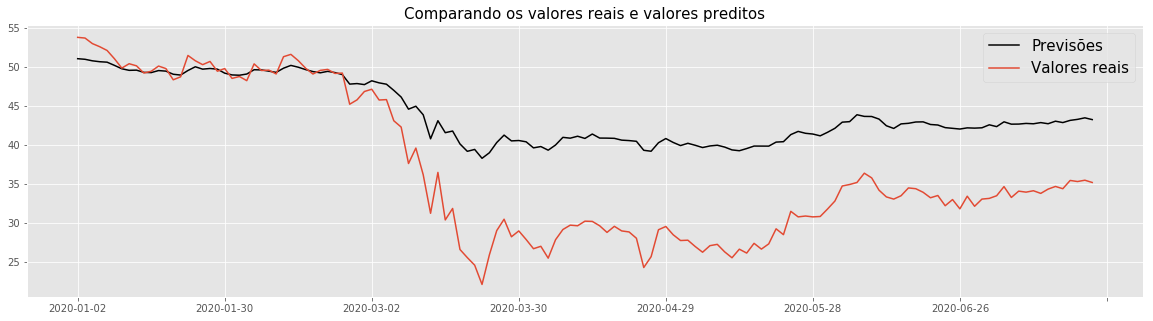

In [89]:
predict=pd.DataFrame(lassolars.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Abaixo podemos ver qie o **RMSE** aumentou em 753% em relação a nossa *baseline*.

In [90]:
print('RMSE do modelo de regressão LassoLars:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão LassoLars: 8.931045447660493
Queda em relação a baseline : 753.103 %


Parâmetros do modelo.

In [91]:
print(lassolars.intercept_,lassolars.coef_)

[28.28212917] [0.         0.22724045 0.19782525]


#### Análise dos resíduos

Dos gráficos temos que:

1) Os resíduos estão se movimentando em torno de zero;

2) O histograma aparenta estar com formato de sino, porém está bem diferente em relação aos histogramas dos outros modelos;

3) é patente que há autocorrelação serial nos dados, visto que o gráfico apresenta que as 13 primeiras defasagens da séries de resíduos são estatisticamente significantes;

4) Os quantis dos resíduos estão sobre a linha reta, o que indica que a distribuição pode ser normal.

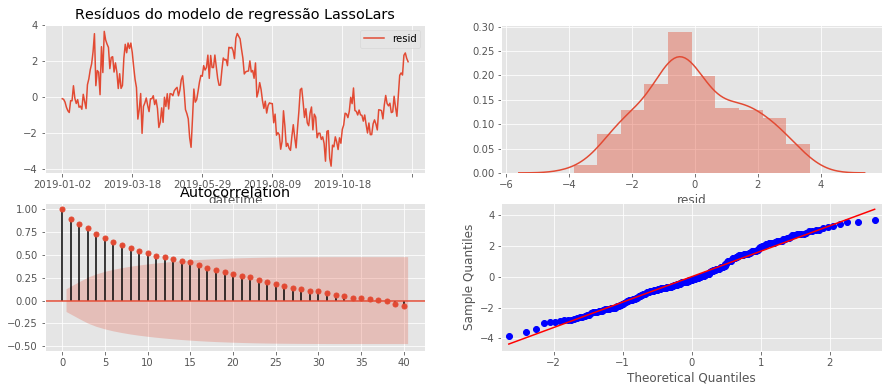

In [92]:
treinado=pd.DataFrame(lassolars.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo de regressão LassoLars", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

Com o teste de normalidade vemos que o *p-valor* ficou acima de 5%, mas dentre todos os modelos esse é o que esteve mais perto da hipótese nula não ser aceita.

In [93]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 5.527977598287663
P-valor : 0.06303981304183576
Assimetria : 0.1493353426994222
Curtose : 2.3323463504846074


O $R^2$ ficou negativo, o que mostra que o desempenho do modelo ficou muito aquém em relação aos outros $R^2$ dos modelos anteriores.

In [94]:
r2_score(pred,itau2[-139:]['close'])

-4.203907081710328

A estatística *Durbin-Watson* está próxima de zero, ou seja, há presença de autocorrelação serial positiva.

In [95]:
durbin_watson(treinado['resid'])

0.2025836248556668

Vemos que a combinação entre o modelo de regressão *Lasso* e o modelo de regressão *LARS* trouxe o pior resultado até agora.

## Regressão Ridge Bayesiana (*Bayesian Ridge*)

Temos uma variante da regressão Ridge que é a regressão *Ridge* bayesiana. Esse modelo é uma abordagem da regressão linear na qual a análise estatística é realizada no contexto da inferência bayesiana.

As vantagens da regressão bayesiana são:

      1) Ele se adapta aos dados disponíveis;

      2) Ele pode ser usado para incluir parâmetros de regularização no procedimento de estimativa.

As desvantagens da regressão bayesiana incluem:

      1) A inferência do modelo pode ser demorada.
      

Instanciando e treinando o modelo.

In [96]:
bayesridge=BayesianRidge().fit(treino,classe)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gerando as previsões.

In [97]:
pred=pd.DataFrame(bayesridge.predict(teste))

Nossos resultados parecem estar bem alinhados aos valores reais.

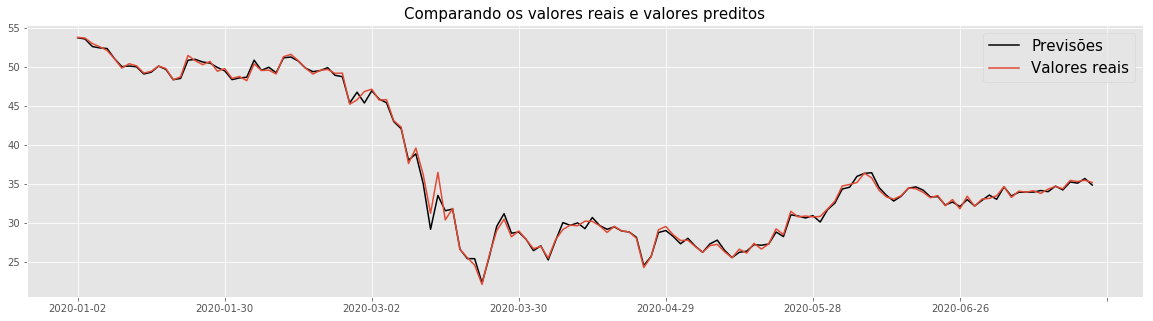

In [98]:
predict=pd.DataFrame(bayesridge.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

O **RMSE** entre as previsões e os valores reais foi o menor até o momento e superou o **RMSE** do modelo de Regressão Linear e do modelo de regressão **Ridge** ( e por conseguinte, teve a maior que percentual em relação a nossa *baseline*).

In [99]:
print('RMSE do modelo de regressão Bayesian Ridge:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo de regressão Bayesian Ridge: 0.4825166413906306
Queda em relação a baseline : -53.909 %


Parâmetros do modelo.

In [100]:
print(bayesridge.intercept_,bayesridge.coef_)

-0.08635831820333806 [-0.68447443  0.82995701  0.85678929]


#### Análise dos resíduos

Todos os gráficos apontam para um comportamento normal dos resíduos gerados pelo modelo de *Bayesian Ridge*.

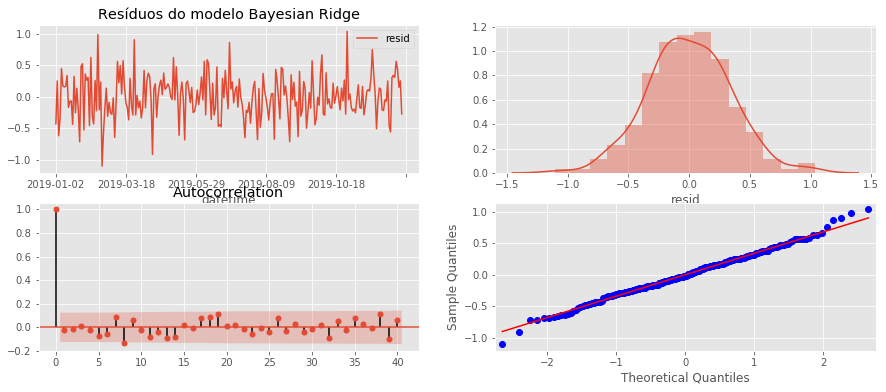

In [101]:
treinado=pd.DataFrame(bayesridge.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo Bayesian Ridge", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O teste de normalidade apontou que os dados são normais.

In [102]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 1.3734991070670672
P-valor : 0.5032090677770867
Assimetria : 0.051177680870326786
Curtose : 3.3499180594779085


O $R^2$ bem alto e praticamente igual ao do modelo *Ridge*.

In [103]:
r2_score(pred,itau2[-139:]['close'])

0.9972698076425206

A estatística *Durbin-Watson* está mais próxima de 2 que a estatística do modelo de regressão *Ridge*.

In [104]:
durbin_watson(treinado['resid'])

2.029873077889197

## *Stochastic Gradient Descent*

Esse modelo possui uma abordagem simples, porém mais eficiente. O gradiente descendente é uma forma é uma forma de otimização para se encontrar mínimos locais de uma função de erro (*loss function*). Um algoritmos de aprendizagem de máquina se inicia de um ponto e a partir desse ponto é calculado o gradiente, para poder minimizar o erro da função de perda.

Vamos treinar o modelo.

In [105]:
sgd=SGDRegressor(loss='squared_loss', eta0=0.00001, power_t=0.15).fit(treino,classe)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Previsões do modelo.

In [106]:
pred=pd.DataFrame(sgd.predict(teste))

#### Comparação entre o real e o predito

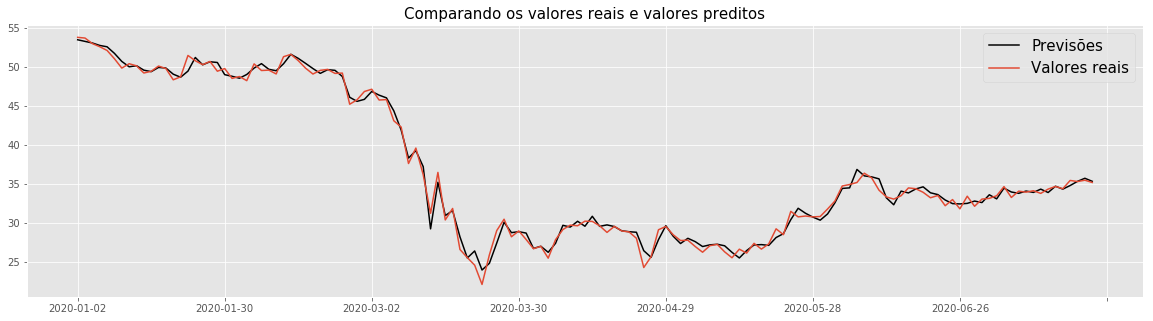

In [107]:
predict=pd.DataFrame(sgd.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Na métrica de avaliação tivemos um queda em relação ao *baseline*, mas o desempenho não superou o dos modeloes de regressão *Ridge* e do modelo *Bayesian Ridge*.

In [108]:
print('RMSE do modelo Stochastic Gradient Descent:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo Stochastic Gradient Descent: 0.7084779113500308
Queda em relação a baseline : -32.325 %


Parâmetros do modelos.

In [109]:
print(sgd.intercept_,sgd.coef_)

[0.00664186] [0.33233622 0.33781693 0.32951774]


#### Análise e diagnóstico dos resíduos

Resíduos flutuando em torno de zero, histograma de aparência de sino, autocorrelação dos resíduos não são estatisticamente significantes e quantis dos resíduos alinhados; há evidência de que os resíduos são normais.

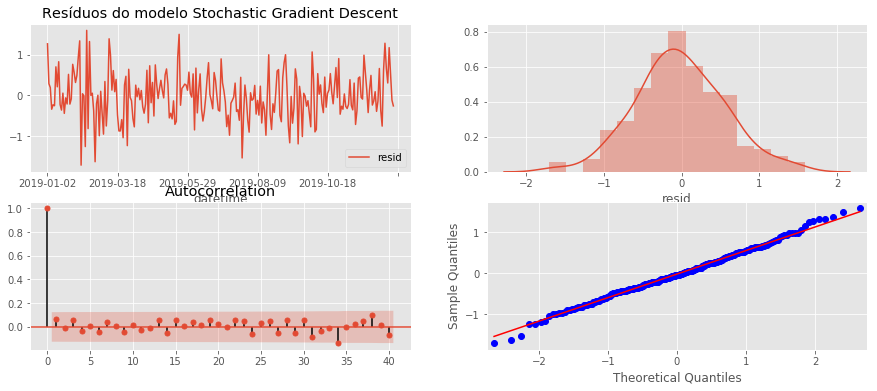

In [110]:
treinado=pd.DataFrame(sgd.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo Stochastic Gradient Descent", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O *p-valor* do teste *Jarque-Bera* teve um resultado superior a 5%, assimetria próximo de zero e curtose próximo de 3.

In [111]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.6284151573924136
P-valor : 0.7303674037095527
Assimetria : 0.06471488337361915
Curtose : 3.2099102321231365


$R^2$ foi alto, porém não superou a métrica da regressão *Ridge* e da *Bayesian Ridge*.

In [112]:
r2_score(pred,itau2[-139:]['close'])

0.9940983719329178

A estatística *Durbin-Watson* ficou um pouco distante de 2, porém ainda assim mostra que não há evidência de autocorrelação serial nos resíduos.

In [113]:
durbin_watson(treinado['resid'])

1.8470086743380763

## *Passive Aggressive Regressor*

Os algoritmos passivo-agressivos são uma família de algoritmos para aprendizagem em larga escala. Eles são semelhantes ao Perceptron no sentido de que não exigem uma taxa de aprendizado. No entanto, ao contrário do Perceptron, eles incluem um parâmetro de regularização *C*. Esse algoritmo pode ser usado para problemas de regressão e problemas de classificação.

Instanciando e treinando o modelo.

In [114]:
par=PassiveAggressiveRegressor().fit(treino,classe)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gerando as previsões.

In [115]:
pred=pd.DataFrame(par.predict(teste))

A previsões parecem acompanhar bem os valores reais, mas podemos ver que há muitos valores que não estão alinhados aos reais.

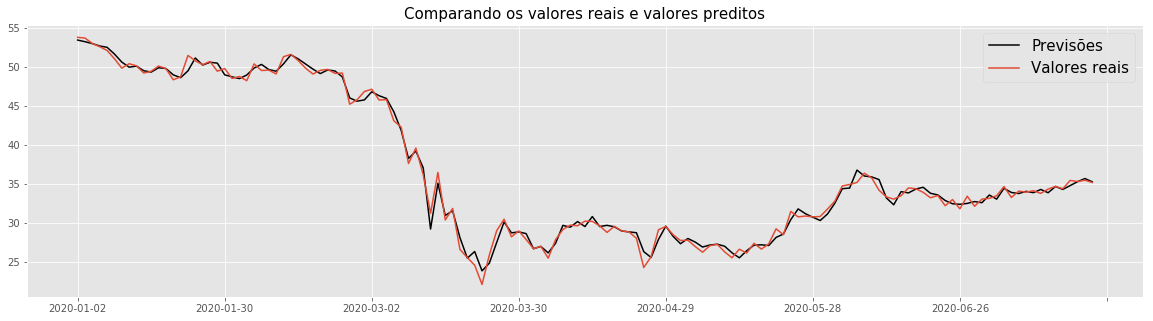

In [116]:
predict=pd.DataFrame(par.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

O **RMSE** foi menor que a *baseline*, porém ainda é menor que os valores dos modelos *Ridge*, *Bayesian Ridge* e Regressão linear. A queda percentual da métrica é menor.

In [117]:
print('RMSE do modelo Passive Agressive:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo Passive Agressive: 0.6799986190953893
Queda em relação a baseline : -35.046 %


Parâmetros do modelo.

In [118]:
print(par.intercept_,par.coef_)

[0.00655535] [0.27569672 0.36617844 0.35679968]


#### Análise dos resíduos

O modelo aperece possuir os resíduos normais e sem autocorrelação serial.

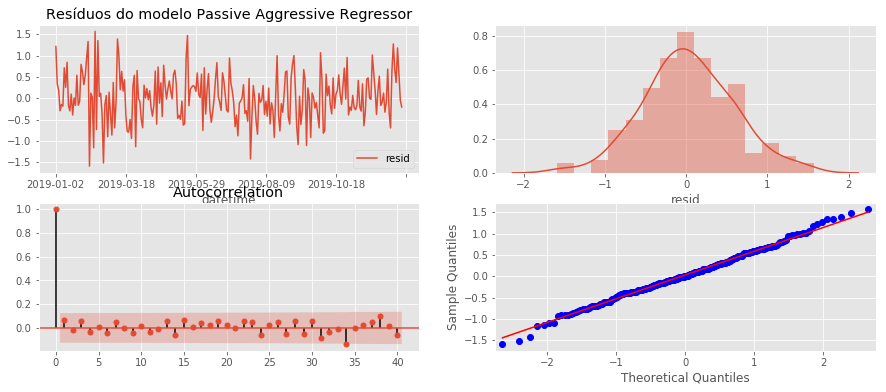

In [119]:
treinado=pd.DataFrame(par.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo Passive Aggressive Regressor", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

Pelo teste *Jarque-Bera* os resíduos são normais.

In [120]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.4778916022951379
P-valor : 0.7874575605122424
Assimetria : 0.060595392499084536
Curtose : 3.177652379796011


O $R^2$ com valor elevado, porém inferior aos modelos *Ridge* e *Bayesian Ridge*.

In [121]:
r2_score(pred,itau2[-139:]['close'])

0.9945501045762609

Entretando os resíduos apresentam autocorrelação serial, pois o valor da estatística *Durbin-Watson* está distante de 2.

In [122]:
durbin_watson(treinado['resid'])

1.8481267497195066

## *Huber Regressor*

Vamos agora utilizar um modelo que é robusto a *outliers* e erros de modelagem. O *Huber Regressor* é diferente da regressão *Ridge* porque aplica uma perda linear a amostras classificadas como *outliers*. Uma amostra é classificada como *inlier* se o erro absoluto dessa amostra for menor que um certo limite. A vantagem em comparação com a regressão *Ridge* é que ele por usar essa perda linear é menos influenciado por *outliers*.

Instanciando e treinando o modelo.

In [123]:
huber=HuberRegressor().fit(treino,classe)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gerando as previsões do modelo.

In [124]:
pred=pd.DataFrame(huber.predict(teste))

Os valores previstos estão alinhados aos valores reais, porém existem períodos em que há discrepâncias, como em alguns dias no mês de março de 2020.

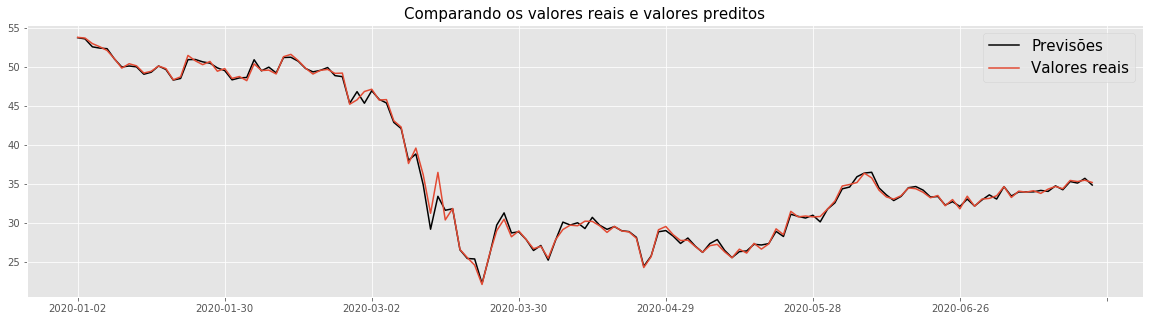

In [125]:
predict=pd.DataFrame(huber.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

O **RMSE** teve um bom resultado, mas não superou a regressão *Ridge* e *Bayesian Ridge*.

In [126]:
print('RMSE do modelo Huber:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo Huber: 0.4928910844963407
Queda em relação a baseline : -52.918 %


Parâmetros do modelo *Huber Regressor*.

In [127]:
print(huber.intercept_,huber.coef_)

0.006792466807870198 [-0.75159436  0.85531839  0.89682842]


#### Análise dos resíduos

Os resíduos aparentam ser bem comportados flutuando em torno de zero, com um histograma em forma de sino (típico de uma distribuição normal), o gráfico de autocorrelação parece não apresentar alguma defasagem dos resíduos estatisticamente significantes e no gráfico QQplot a maioria dos quantis dos resíduos estão sobre a linha vermelha. Logo há uma forte evidência visual para normalidade dos resíduos.

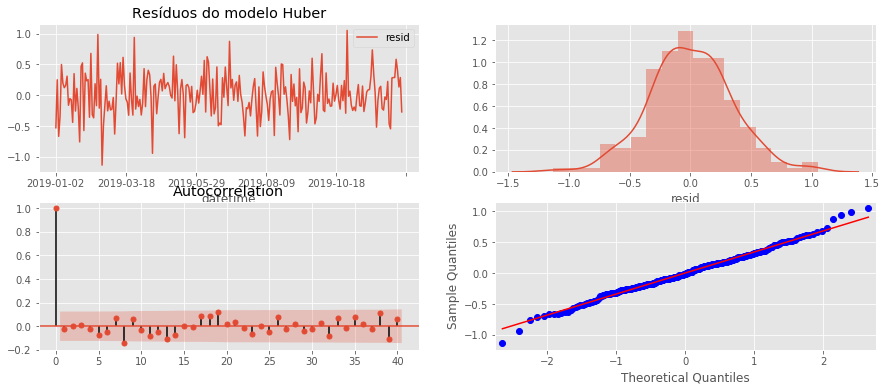

In [128]:
treinado=pd.DataFrame(huber.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo Huber", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

Pelo teste de normalidade *Jarque-Bera* a hipótese de normalidade é aceita a um nível de significância de 5%.

In [129]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 2.699759280851735
P-valor : 0.2592714645710687
Assimetria : 0.05004581799021749
Curtose : 3.501247136237166


O $R^2$ ficou bem próximo do valores dos $R^2$ dos modelos de melhores desempenho.

In [130]:
r2_score(pred,itau2[-139:]['close'])

0.9971424978408476

A estatística *Durbin-Watson* está próxima de 2, o que indica ausência de autocorrelação serial.

In [131]:
durbin_watson(treinado['resid'])

2.0330476162653586

## *Theil Sen Regressor*

Vamos usar outro modelo que é robusto a *outliers* multivariados. Esse modelo tem um problema: A medida que a dimensionalidade do probelam aumenta, ele começa a perder a sua propriedade de robustez, o que o pode tornar não muito melhor do que um modelo de mínimos quadrados ordinários. 

Instanciando e treinando o modelo.

In [132]:
theilsen=TheilSenRegressor().fit(treino,classe)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gerando as previsões com o modelo.

In [133]:
pred=pd.DataFrame(theilsen.predict(teste))

O modelo geraou previsões bem adequadas aos valores reais.

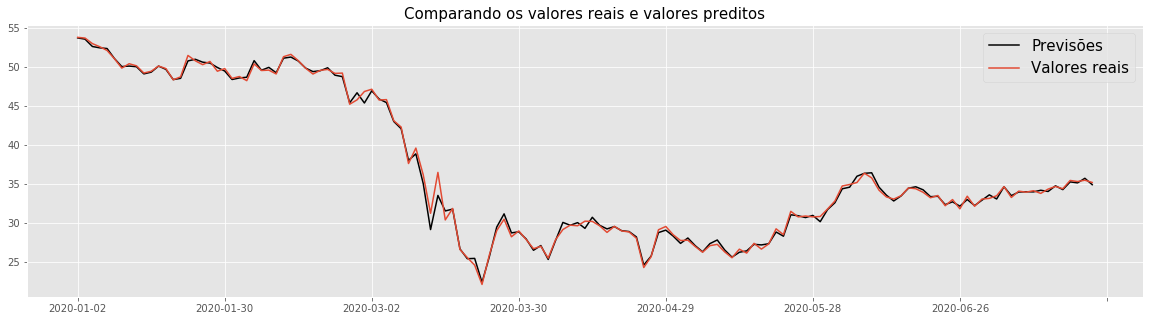

In [134]:
predict=pd.DataFrame(theilsen.predict(teste))
predict=predict.set_index(compara.index)

pred.plot(figsize=(20,5), color='black')
itau2[-139:]['close'].plot(figsize=(20,5))
plt.xlabel('')
plt.title('Comparando os valores reais e valores preditos',size=15)
plt.legend(['Previsões','Valores reais'],fontsize=15);

Observando o valor da métrica **RMSE** o modelo apresentou o melhor resultado dentre todos os modelos.

In [135]:
print('RMSE do modelo Huber:',rmse(predict,compara)[0])
print('Queda em relação a baseline :',round(((rmse(predict,compara)-baseline)/baseline)[0]*100,3), '%')

RMSE do modelo Huber: 0.48243712896847296
Queda em relação a baseline : -53.917 %


Parâmetros do modelo.

In [136]:
print(theilsen.intercept_,theilsen.coef_)

0.032805763127552304 [-0.65011683  0.79462262  0.85565461]


#### Análise dos resíduos

Aqui como os demais modelos, o resultado apresenta (visualmente) que há um comportamento normal dos resíduos gerados pelo modelo.

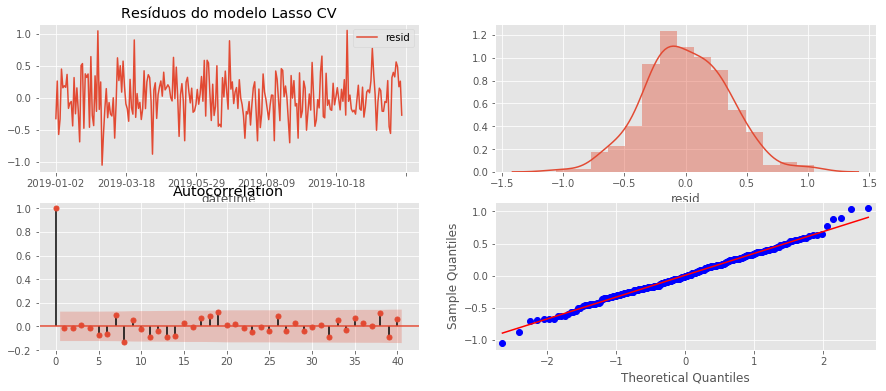

In [137]:
treinado=pd.DataFrame(theilsen.predict(treino)).set_index(classe.index)
treinado['treinado']=classe
treinado.columns=['predito','classe']
#gerando os resíduos
treinado['resid'] = treinado['classe']-treinado['predito']

residuals = pd.DataFrame(treinado['resid'])
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuals.plot(title="Resíduos do modelo Lasso CV", ax=ax[0][0])
sns.distplot(treinado['resid'],ax=ax[0][1])
plot_acf(treinado['resid'],lags=40, ax=ax[1][0])
qqplot(treinado['resid'],line='s', ax=ax[1][1]);

O teste de normalidade apresentou, em um nível de significância de 5%, que os resíduos são normais.

In [138]:
print(' '*254)
test1 = jarque_bera(treinado['resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 1.4162947126176104
P-valor : 0.4925558832353888
Assimetria : 0.1116482121641157
Curtose : 3.295295590083293


O $R^2$ elevado, o mais elevado dentre todos os modelos.

In [139]:
r2_score(pred,itau2[-139:]['close'])

0.9972610552154939

E esse modelo mostrou uma estatística *Durbin-Watson* mais próxima de 2, que as demais. Rejeitamos a presença de autocorrelação serial nos resíduos.

In [140]:
durbin_watson(treinado['resid'])

2.0204493505730516

## Comparando os resultados dos modelos de regressão

Vamos agora observar em uma tabela os resultados dos modelos com as métricas **RMSE** e $R^2$. Como podemos observar, na tabela, abaixo o modelo linear de melhor desempenho foi a **Regressão Theil Sen** que teve a menor métrica de avaliação e o maior $R^2$. Além disso o modelo tem os resíduos normais e sem presença de autocorrelação serial.


|          Modelo                 ||   **RMSE**  || Queda do RMSE||     $R^2$       ||
|:-------------------------------:||:-----------:||:------------:||:---------------:||
|*Baseline*                       || 1.04688     ||  ------      ||   0.987982      ||
|Regressão linear                 || 0.48333     ||  -53.831%    ||   0.985         ||
|Regressão Ridge                  || 0.48288     ||  -53.874%    ||   0.997265      ||
|Regressão Lasso                  || 0.61173     ||  -41.566%    ||   0.995491      ||
|Regressão ElasticNet             || 1.58271     ||  +51.182%    ||   0.9642643     ||
|Regressão Multi Task Elastic Net || 0.57374     ||  -45.195%    ||   0.99606       ||
|Regressão LARS                   || 0.48333     ||  -53.831%    ||   0.985         ||
|Regressão Lasso Lars             || 8.93104     ||  +753.103%   ||   -4.203907     ||
|Regressão Bayesian Ridge         || 0.48251     ||  -53.909%    ||   0.997269      ||
|Regressão SGD                    || 0.70875     ||  -32.299%    ||   0.99409       ||
|Regressão Passive Aggressive     || 0.79802     ||  -23.772%    ||   0.992635      ||
|Regressão Huber                  || 0.49289     ||  -52.918%    ||   0.997142      ||
|**Regressão Theil Sen**          || **0.48117** ||  **-54.037%**||   **0.997294**  ||

## Conclusão

Nesse projeto trabalhamos com modelos lineares de regressão, do mais simples ao mais elaborados para previsão de preços de fechamento de ações do Itaú Unibanco. Existem outros modelos que não foram usados nesse projeto, como, por exemplo, aqueles que utilizam *cross validation* em sua fórmula (LassoCV, RidgeCV, etc), mas que em outra oportunidade podem ser aplicados. Não aplicamos nenhuma técnica de *Tunning* nos modelos visto que já encontramos resultados bastantes satisfatórios para as nossas métricas.

Por fim, trabalhamos com modelos lineares, pois são os modelos mais simples e os seus coeficientes podem ser interpretados, diferente de outros modelos que são praticamente *caixas pretas*.